In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving asian_bird_species_ml_dataset.csv to asian_bird_species_ml_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import pandas as pd
df = pd.read_csv('asian_bird_species_ml_dataset.csv')
print("DataFrame 'df' has been defined. Displaying the first 5 rows:")
display(df.head())

DataFrame 'df' has been defined. Displaying the first 5 rows:


,Country,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Bird_Species
0,Thailand,18.971004,2708.280873,3233.101758,0.358335,0.700935,Kingfisher
1,Singapore,19.425109,1102.203410,1015.284313,0.912892,0.194274,Sparrow
2,Cambodia,32.553642,550.653997,983.229757,0.565688,0.447201,Pigeon
3,Sri Lanka,22.612047,1528.141108,1611.057594,0.182672,0.829821,Kingfisher
4,Nepal,5.985400,519.078577,3578.571190,0.139599,0.654725,Eagle


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1000 non-null   object 
 1   Temperature      1000 non-null   float64
 2   Precipitation    1000 non-null   float64
 3   Elevation        1000 non-null   float64
 4   Urbanization     1000 non-null   float64
 5   Water_Proximity  1000 non-null   float64
 6   Bird_Species     1000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [5]:
df.isnull().sum()

,0
Country,0
Temperature,0
Precipitation,0
Elevation,0
Urbanization,0
Water_Proximity,0
Bird_Species,0


In [6]:
import numpy as np
print("Missing values per column:")
display(df.isnull().sum())
print("\nOutlier Analysis using IQR method:")
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}': {len(outliers)} outliers detected.")
    else:
        print(f"Column '{col}': No outliers detected.")

Missing values per column:


,0
Country,0
Temperature,0
Precipitation,0
Elevation,0
Urbanization,0
Water_Proximity,0
Bird_Species,0



Outlier Analysis using IQR method:
Column 'Temperature': No outliers detected.
Column 'Precipitation': No outliers detected.
Column 'Elevation': No outliers detected.
Column 'Urbanization': No outliers detected.
Column 'Water_Proximity': No outliers detected.


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = df.drop('Bird_Species', axis=1)
y = df['Bird_Species']

print("Input features (X) shape:", X.shape)
print("Output target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded_df = pd.DataFrame(y_encoded, columns=['Bird_Species_Encoded'], index=X.index)

df_corr = pd.concat([X, y_encoded_df], axis=1)
df_corr_numerical_only = df_corr.select_dtypes(include=['number'])

corr_matrix_full = df_corr_numerical_only.corr()

target_correlations = corr_matrix_full['Bird_Species_Encoded'].drop('Bird_Species_Encoded')

sorted_target_correlations = target_correlations.abs().sort_values(ascending=False)

print("\nCorrelations between 'Bird_Species' (encoded) and other features (sorted by absolute value):")
display(sorted_target_correlations)

Input features (X) shape: (1000, 6)
Output target (y) shape: (1000,)

First 5 rows of X:


,Country,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity
0,Thailand,18.971004,2708.280873,3233.101758,0.358335,0.700935
1,Singapore,19.425109,1102.203410,1015.284313,0.912892,0.194274
2,Cambodia,32.553642,550.653997,983.229757,0.565688,0.447201
3,Sri Lanka,22.612047,1528.141108,1611.057594,0.182672,0.829821
4,Nepal,5.985400,519.078577,3578.571190,0.139599,0.654725



First 5 rows of y:


,Bird_Species
0,Kingfisher
1,Sparrow
2,Pigeon
3,Kingfisher
4,Eagle



Correlations between 'Bird_Species' (encoded) and other features (sorted by absolute value):


,Bird_Species_Encoded
Temperature,0.530038
Precipitation,0.284828
Urbanization,0.283437
Water_Proximity,0.107855
Elevation,0.042048


In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include='object').columns

if not categorical_cols.empty:
    print(f"Categorical columns identified for one-hot encoding: {list(categorical_cols)}")

    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    encoded_features = one_hot_encoder.fit_transform(X[categorical_cols])
    encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

    X = X.drop(columns=categorical_cols)

    X = pd.concat([X, encoded_df], axis=1)
    print("Categorical features successfully one-hot encoded and concatenated to X.")
else:
    print("No categorical columns found in X for one-hot encoding.")

print("\nUpdated X head after one-hot encoding:")
display(X.head())
print("\nUpdated X info after one-hot encoding:")
X.info()

Categorical columns identified for one-hot encoding: ['Country']
Categorical features successfully one-hot encoded and concatenated to X.

Updated X head after one-hot encoding:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Country_Afghanistan,Country_Bangladesh,Country_Bhutan,Country_Cambodia,Country_China,...,Country_Mongolia,Country_Myanmar,Country_Nepal,Country_Pakistan,Country_Philippines,Country_Singapore,Country_South Korea,Country_Sri Lanka,Country_Thailand,Country_Vietnam
0,18.971004,2708.280873,3233.101758,0.358335,0.700935,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,19.425109,1102.203410,1015.284313,0.912892,0.194274,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,32.553642,550.653997,983.229757,0.565688,0.447201,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.612047,1528.141108,1611.057594,0.182672,0.829821,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.985400,519.078577,3578.571190,0.139599,0.654725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Updated X info after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          1000 non-null   float64
 1   Precipitation        1000 non-null   float64
 2   Elevation            1000 non-null   float64
 3   Urbanization         1000 non-null   float64
 4   Water_Proximity      1000 non-null   float64
 5   Country_Afghanistan  1000 non-null   float64
 6   Country_Bangladesh   1000 non-null   float64
 7   Country_Bhutan       1000 non-null   float64
 8   Country_Cambodia     1000 non-null   float64
 9   Country_China        1000 non-null   float64
 10  Country_India        1000 non-null   float64
 11  Country_Indonesia    1000 non-null   float64
 12  Country_Japan        1000 non-null   float64
 13  Country_Laos         1000 non-null   float64
 14  Country_Malaysia     1000 non-null   float64
 15 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train: (800, 25)
Shape of X_test: (200, 25)
Shape of y_train_encoded: (800,)
Shape of y_test_encoded: (200,)


In [10]:
print("Full Correlation Matrix:")
display(corr_matrix_full)

print("\nCorrelations with 'Bird_Species' (encoded), sorted by absolute value:")
display(sorted_target_correlations)

Full Correlation Matrix:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Bird_Species_Encoded
Temperature,1.000000,0.022283,0.010251,0.025253,0.022838,0.530038
Precipitation,0.022283,1.000000,-0.046999,0.062899,-0.023812,-0.284828
Elevation,0.010251,-0.046999,1.000000,0.018977,0.003082,-0.042048
Urbanization,0.025253,0.062899,0.018977,1.000000,-0.026522,0.283437
Water_Proximity,0.022838,-0.023812,0.003082,-0.026522,1.000000,0.107855
Bird_Species_Encoded,0.530038,-0.284828,-0.042048,0.283437,0.107855,1.000000



Correlations with 'Bird_Species' (encoded), sorted by absolute value:


,Bird_Species_Encoded
Temperature,0.530038
Precipitation,0.284828
Urbanization,0.283437
Water_Proximity,0.107855
Elevation,0.042048


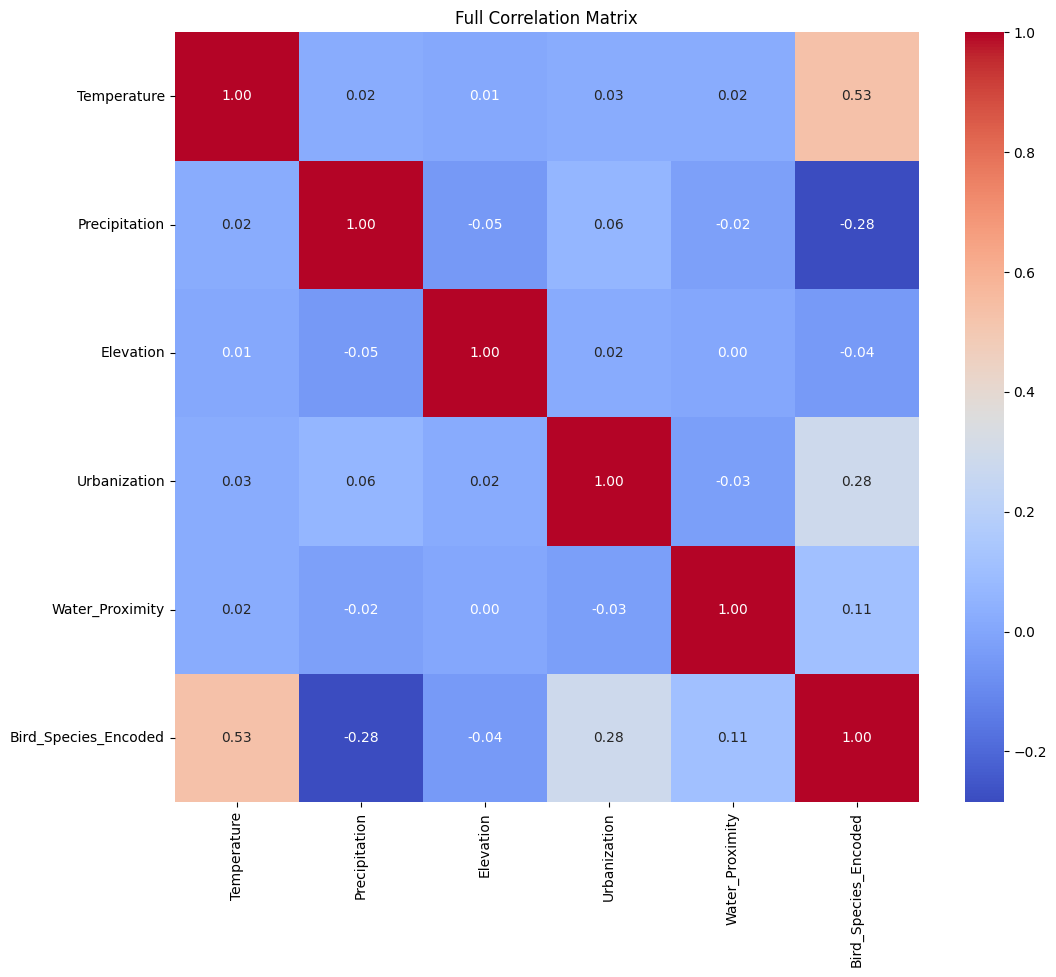

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Full Correlation Matrix')
plt.show()

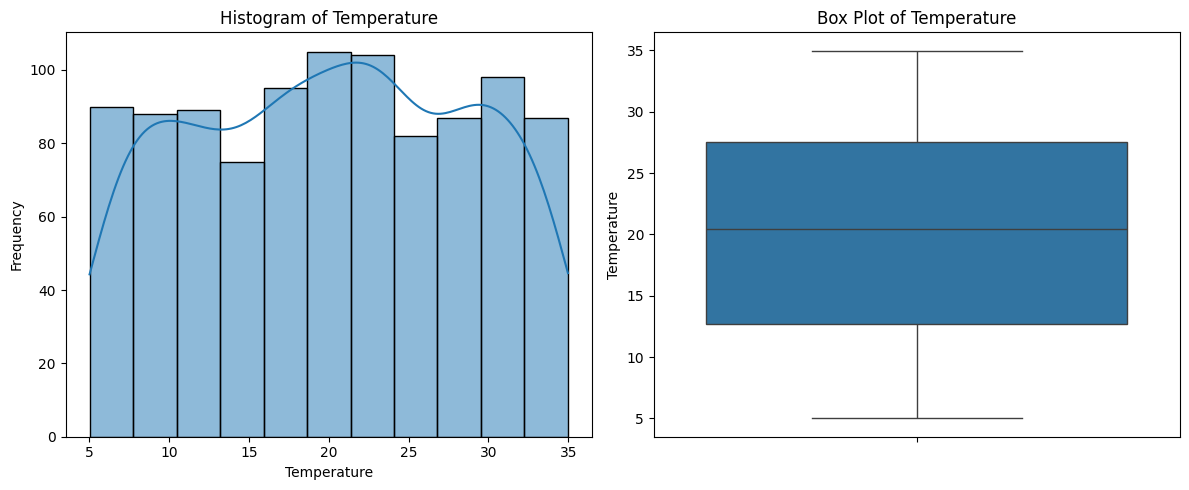

IQR for 'Temperature': 14.83


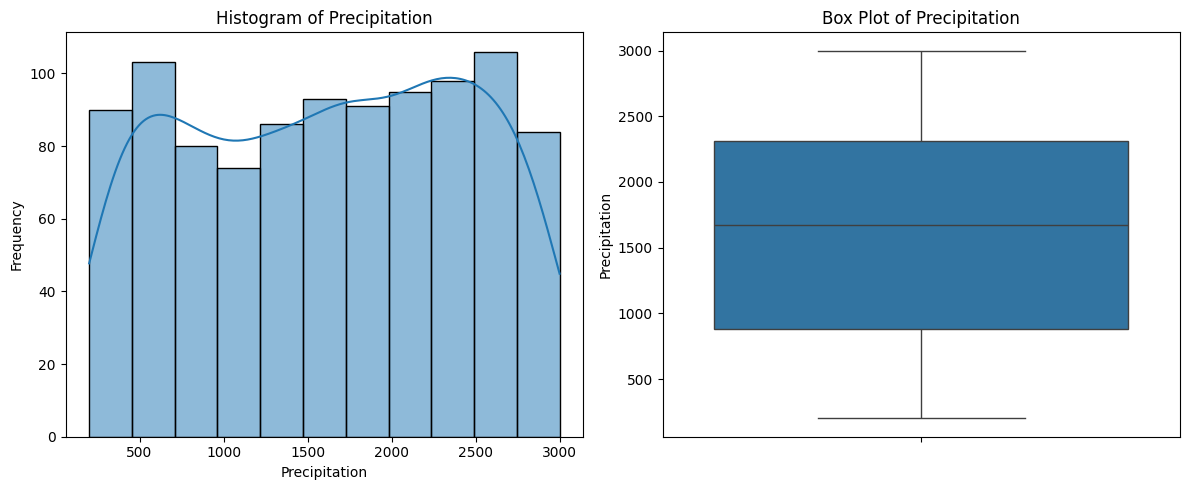

IQR for 'Precipitation': 1431.41


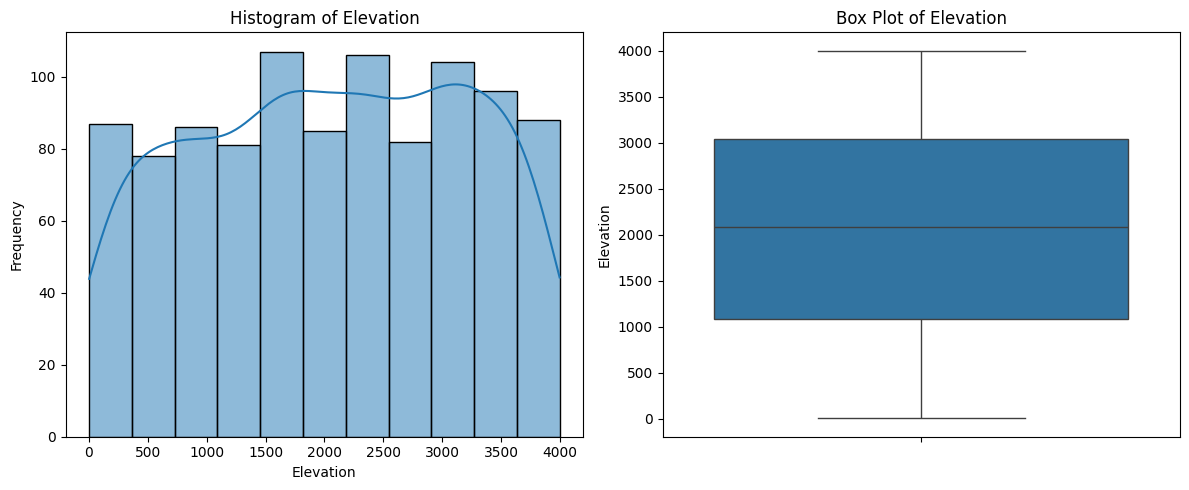

IQR for 'Elevation': 1947.37


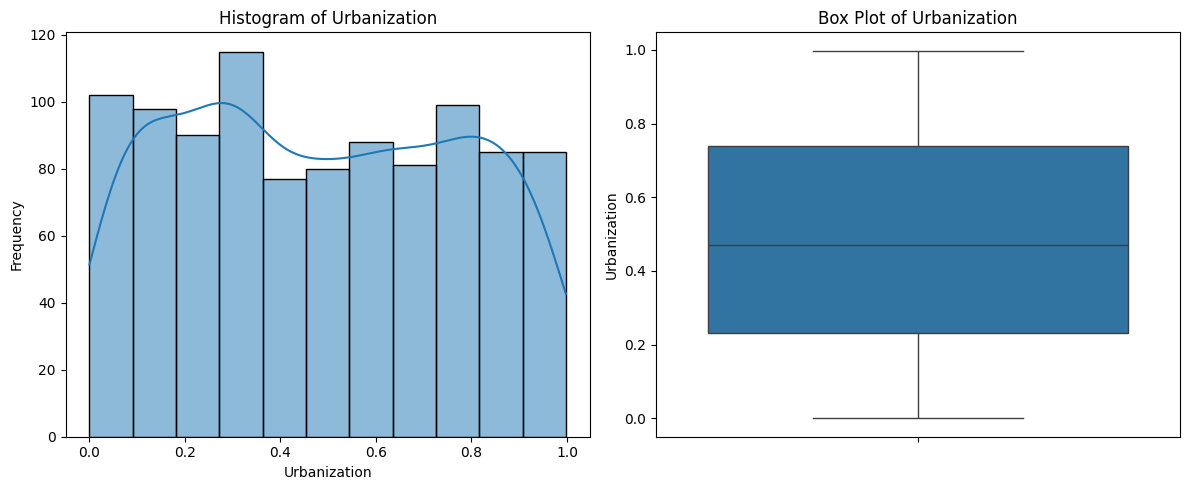

IQR for 'Urbanization': 0.51


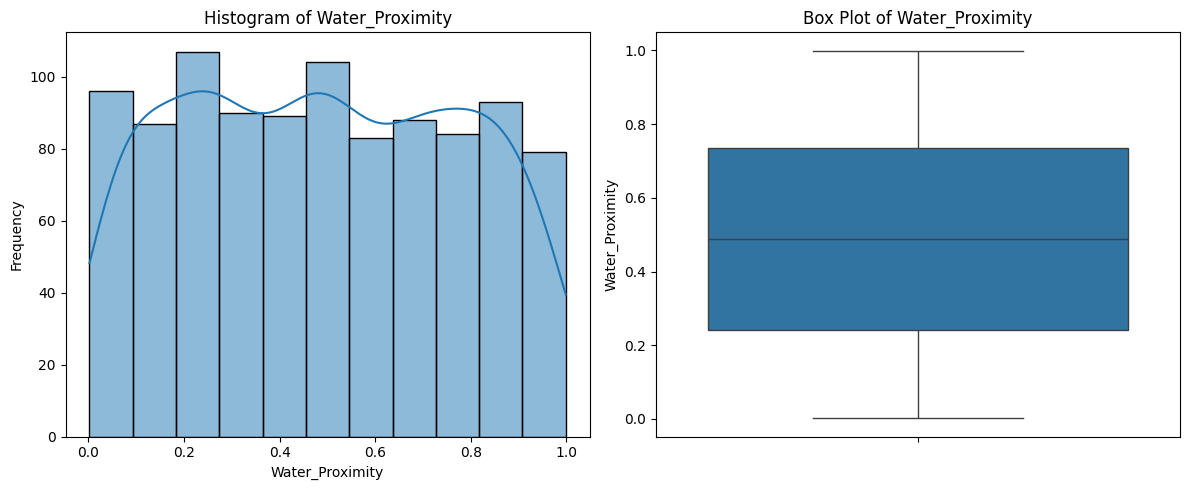

IQR for 'Water_Proximity': 0.49


In [12]:
numerical_cols_df = df.select_dtypes(include=['number']).columns

for col in numerical_cols_df:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR for '{col}': {IQR:.2f}")

Class distribution before SMOTE:


,count
0,103
1,165
2,11
3,20
4,100
5,44
6,72
7,93
8,167
9,25



Shape of X_train after SMOTE: (1670, 25)
Shape of y_train after SMOTE: (1670,)

Class distribution after SMOTE:


,count
0,167
1,167
2,167
3,167
4,167
5,167
6,167
7,167
8,167
9,167


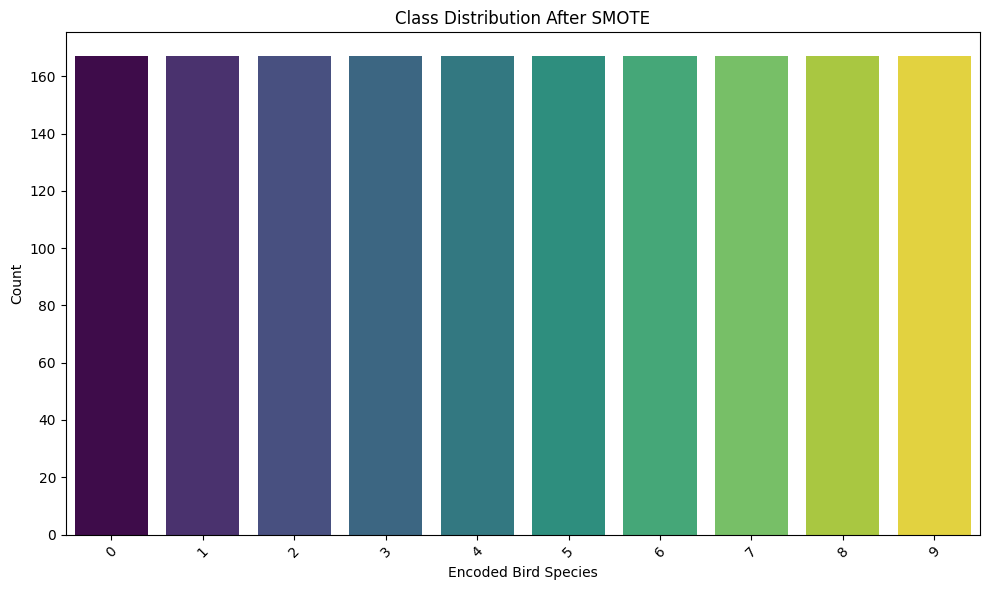

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
print("Class distribution before SMOTE:")
display(pd.Series(y_train_encoded).value_counts().sort_index())

#  SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

print("\nShape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

# After SMOTE
print("\nClass distribution after SMOTE:")
class_distribution_after_smote = pd.Series(y_train_resampled).value_counts().sort_index()
display(class_distribution_after_smote)

# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution_after_smote.index, y=class_distribution_after_smote.values, hue=class_distribution_after_smote.index, palette='viridis', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Encoded Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
print("RandomForestClassifier initialized successfully.")

RandomForestClassifier initialized successfully.


In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}
print("Hyperparameter grid 'param_grid' defined successfully.")

Hyperparameter grid 'param_grid' defined successfully.


In [16]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
print("GridSearchCV object 'grid_search' initialized successfully.")

GridSearchCV object 'grid_search' initialized successfully.


In [17]:
print("Starting GridSearchCV training...")
grid_search.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV training completed.")


Starting GridSearchCV training...
GridSearchCV training completed.


In [18]:
print("Best parameters found by GridSearchCV:")
display(grid_search.best_params_)
print("\nBest accuracy score achieved by GridSearchCV:")
display(grid_search.best_score_)

Best parameters found by GridSearchCV:


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}


Best accuracy score achieved by GridSearchCV:


np.float64(0.9826347305389221)

after first push

In [19]:
from sklearn.metrics import accuracy_score, classification_report

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Estimator retrieved.")

y_pred = best_rf_model.predict(X_test)
print("Predictions made on the test set.")

accuracy = accuracy_score(y_test_encoded, y_pred)

class_report = classification_report(y_test_encoded, y_pred)

print(f"\nAccuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Best Random Forest Estimator retrieved.
Predictions made on the test set.

Accuracy Score: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       0.95      0.97      0.96        37
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00         7
           4       0.93      1.00      0.97        28
           5       1.00      1.00      1.00        10
           6       1.00      0.77      0.87        13
           7       0.86      0.92      0.89        26
           8       1.00      0.92      0.96        36
           9       1.00      0.50      0.67         6

    accuracy                           0.94       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.95      0.94      0.94       200



In [20]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)
print("SVC classifier initialized successfully with random_state=42.")

SVC classifier initialized successfully with random_state=42.


In [21]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
print("Hyperparameter grid 'param_grid_svm' defined successfully.")

Hyperparameter grid 'param_grid_svm' defined successfully.


In [22]:
from sklearn.model_selection import GridSearchCV

grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
print("GridSearchCV object 'grid_search_svm' initialized successfully for SVM.")

GridSearchCV object 'grid_search_svm' initialized successfully for SVM.


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the feature set X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("First 5 rows of X_scaled:")
display(X_scaled.head())
print("\nShape of X_scaled:", X_scaled.shape)

First 5 rows of X_scaled:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Country_Afghanistan,Country_Bangladesh,Country_Bhutan,Country_Cambodia,Country_China,...,Country_Mongolia,Country_Myanmar,Country_Nepal,Country_Pakistan,Country_Philippines,Country_Singapore,Country_South Korea,Country_Sri Lanka,Country_Thailand,Country_Vietnam
0,0.465874,0.896051,0.808559,0.359069,0.700981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.481025,0.322180,0.253606,0.915052,0.192781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.919030,0.125105,0.245585,0.566955,0.446476,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.587350,0.474373,0.402684,0.182955,0.830258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.032638,0.113822,0.895005,0.139771,0.654630,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape of X_scaled: (1000, 25)


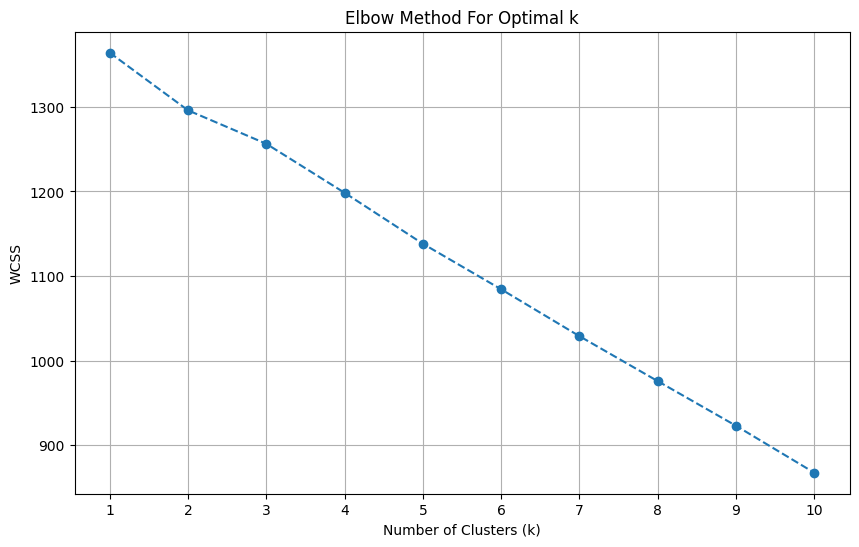

WCSS values calculated for different numbers of clusters and plotted for Elbow Method.


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
max_clusters = 10  # Define a reasonable range for number of clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

print("WCSS values calculated for different numbers of clusters and plotted for Elbow Method.")

In [25]:
optimal_k = 3  # Based on visual inspection of the Elbow Method plot

# Perform K-Means clustering with the optimal k
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X_scaled)

# Add the cluster labels to the scaled DataFrame
X_scaled_clustered = X_scaled.copy()
X_scaled_clustered['Cluster'] = clusters

print(f"K-Means clustering performed with {optimal_k} clusters.")
print("First 5 rows of X_scaled_clustered with cluster labels:")
display(X_scaled_clustered.head())
print("Cluster distribution:")
display(X_scaled_clustered['Cluster'].value_counts().sort_index())

K-Means clustering performed with 3 clusters.
First 5 rows of X_scaled_clustered with cluster labels:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Country_Afghanistan,Country_Bangladesh,Country_Bhutan,Country_Cambodia,Country_China,...,Country_Myanmar,Country_Nepal,Country_Pakistan,Country_Philippines,Country_Singapore,Country_South Korea,Country_Sri Lanka,Country_Thailand,Country_Vietnam,Cluster
0,0.465874,0.896051,0.808559,0.359069,0.700981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.481025,0.322180,0.253606,0.915052,0.192781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.919030,0.125105,0.245585,0.566955,0.446476,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.587350,0.474373,0.402684,0.182955,0.830258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,0.032638,0.113822,0.895005,0.139771,0.654630,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Cluster distribution:


,count
Cluster,
0,333
1,302
2,365


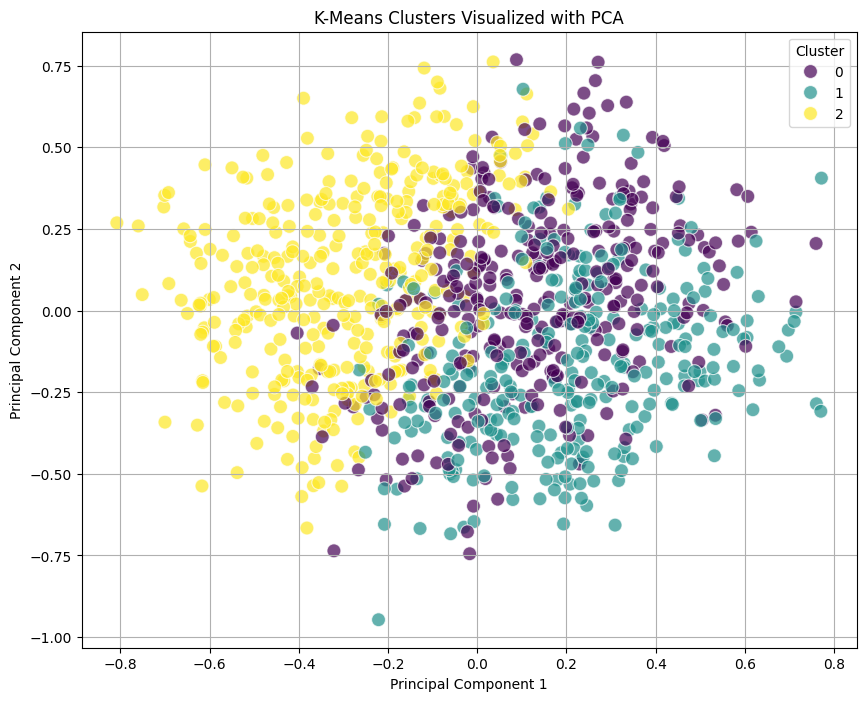

Clusters visualized using PCA.


In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate PCA to reduce dimensions to 2
pca = PCA(n_components=2)

# Fit and transform the scaled data using PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters using the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    s=100, # size of points
    alpha=0.7 # transparency
)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("Clusters visualized using PCA.")

In [27]:
print("Analyzing cluster characteristics...")

# Join the cluster labels back to the original (unscaled) DataFrame 'df'
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

print("\nDescriptive statistics for each cluster (numerical features):")
display(df_clustered.groupby('Cluster')[['Temperature', 'Precipitation', 'Elevation', 'Urbanization', 'Water_Proximity']].mean())

print("\nDistribution of Bird_Species within each cluster:")
display(pd.crosstab(df_clustered['Cluster'], df_clustered['Bird_Species'], normalize='index'))

print("\nDistribution of Countries within each cluster:")
display(pd.crosstab(df_clustered['Cluster'], df_clustered['Country'], normalize='index'))

print("Cluster analysis completed.")

Analyzing cluster characteristics...

Descriptive statistics for each cluster (numerical features):


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity
Cluster,,,,,
0,21.475070,2177.914173,2707.200638,0.560727,0.576241
1,20.598620,1939.572212,1101.629407,0.549386,0.343143
2,18.465741,837.927973,2223.454153,0.357721,0.528274



Distribution of Bird_Species within each cluster:


Bird_Species,Crane,Eagle,Falcon,Hornbill,Kingfisher,Parrot,Peacock,Pigeon,Sparrow,Woodpecker
Cluster,,,,,,,,,,
0,0.087087,0.219219,0.000000,0.033033,0.249249,0.066066,0.051051,0.006006,0.288288,0.000000
1,0.307947,0.056291,0.009934,0.052980,0.099338,0.062914,0.096026,0.036424,0.274834,0.003311
2,0.038356,0.306849,0.032877,0.000000,0.041096,0.035616,0.106849,0.290411,0.065753,0.082192



Distribution of Countries within each cluster:


Country,Afghanistan,Bangladesh,Bhutan,Cambodia,China,India,Indonesia,Japan,Laos,Malaysia,Mongolia,Myanmar,Nepal,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Thailand,Vietnam
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.096096,0.036036,0.069069,0.108108,0.060060,0.006006,0.024024,0.033033,0.045045,0.081081,0.063063,0.039039,0.036036,0.039039,0.069069,0.042042,0.051051,0.045045,0.018018,0.039039
1,0.033113,0.029801,0.023179,0.016556,0.023179,0.195364,0.092715,0.046358,0.033113,0.036424,0.046358,0.036424,0.052980,0.066225,0.013245,0.072848,0.036424,0.036424,0.069536,0.039735
2,0.035616,0.057534,0.041096,0.043836,0.057534,0.016438,0.076712,0.090411,0.043836,0.027397,0.054795,0.073973,0.079452,0.030137,0.024658,0.030137,0.065753,0.041096,0.043836,0.065753


Cluster analysis completed.


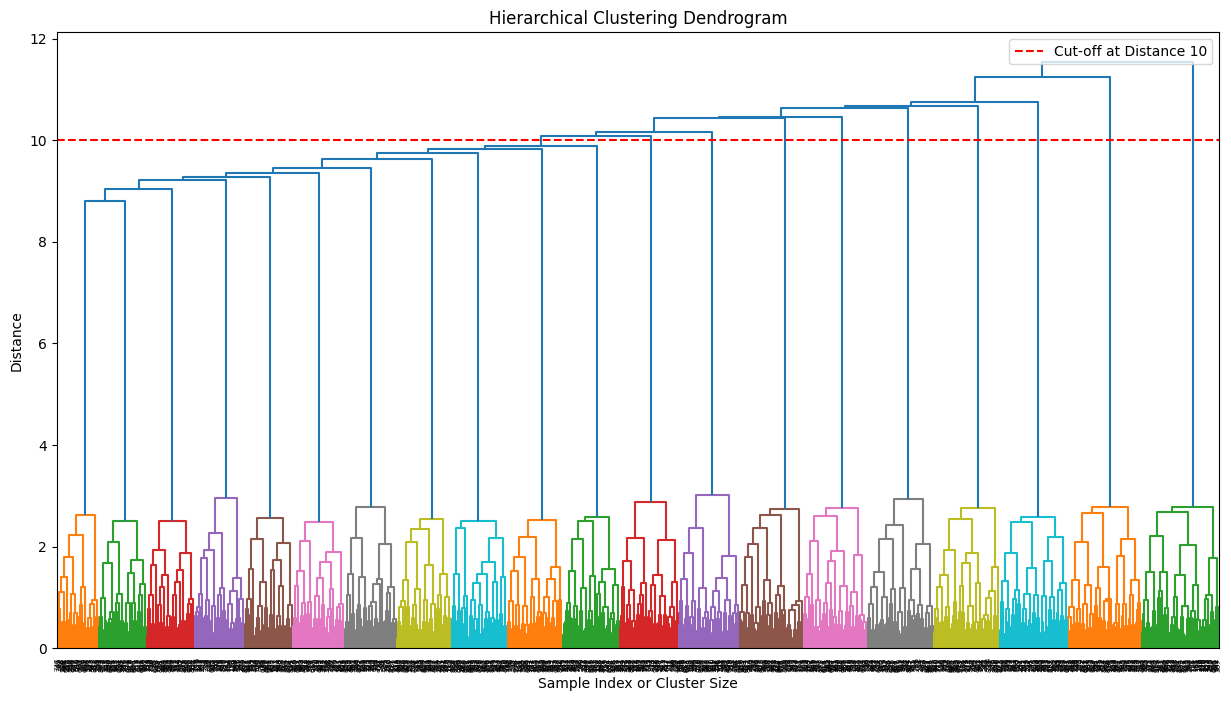

Hierarchical clustering and dendrogram plotted successfully.


In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked_data = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked_data,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--', label='Cut-off at Distance 10')
plt.legend()
plt.show()

print("Hierarchical clustering and dendrogram plotted successfully.")

In [29]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

threshold = 10
hierarchical_clusters = fcluster(linked_data, threshold, criterion='distance')

df_hierarchical_clustered = df.copy()
df_hierarchical_clustered['Hierarchical_Cluster'] = hierarchical_clusters

print(f"Number of hierarchical clusters formed at a distance threshold of {threshold}: {len(np.unique(hierarchical_clusters))}")
print("\nMean points (characteristics) for each hierarchical cluster:")

display(df_hierarchical_clustered.groupby('Hierarchical_Cluster')[['Temperature', 'Precipitation', 'Elevation', 'Urbanization', 'Water_Proximity']].mean())

print("\nDistribution of Bird_Species within each hierarchical cluster:")
display(pd.crosstab(df_hierarchical_clustered['Hierarchical_Cluster'], df_hierarchical_clustered['Bird_Species'], normalize='index'))

print("\nDistribution of Countries within each hierarchical cluster:")
display(pd.crosstab(df_hierarchical_clustered['Hierarchical_Cluster'], df_hierarchical_clustered['Country'], normalize='index'))

Number of hierarchical clusters formed at a distance threshold of 10: 10

Mean points (characteristics) for each hierarchical cluster:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity
Hierarchical_Cluster,,,,,
1,20.424706,1515.860800,1759.197511,0.548382,0.469588
2,20.495352,1524.016749,1877.324836,0.497581,0.468396
3,19.324341,1446.864206,1901.125963,0.514907,0.477633
4,20.980270,1579.263638,2259.637688,0.391884,0.475978
5,20.379732,1720.183357,2170.802372,0.447744,0.520237
6,21.016675,1757.314892,1946.149009,0.514602,0.496881
7,20.920554,1718.118473,2142.751832,0.497463,0.466962
8,20.053957,1663.715957,2098.617073,0.462078,0.559514
9,19.837328,1501.446213,2348.035711,0.476839,0.509809



Distribution of Bird_Species within each hierarchical cluster:


Bird_Species,Crane,Eagle,Falcon,Hornbill,Kingfisher,Parrot,Peacock,Pigeon,Sparrow,Woodpecker
Hierarchical_Cluster,,,,,,,,,,
1,0.134328,0.149254,0.029851,0.029851,0.089552,0.044776,0.104478,0.134328,0.253731,0.029851
2,0.140625,0.234375,0.015625,0.031250,0.093750,0.062500,0.078125,0.109375,0.218750,0.015625
3,0.189655,0.224138,0.000000,0.017241,0.086207,0.034483,0.068966,0.172414,0.155172,0.051724
4,0.122807,0.192982,0.000000,0.052632,0.105263,0.087719,0.070175,0.157895,0.157895,0.052632
5,0.105263,0.192982,0.000000,0.000000,0.192982,0.070175,0.087719,0.157895,0.157895,0.035088
6,0.200000,0.145455,0.018182,0.018182,0.109091,0.054545,0.036364,0.127273,0.254545,0.036364
7,0.090909,0.236364,0.000000,0.054545,0.072727,0.036364,0.145455,0.090909,0.236364,0.036364
8,0.134615,0.250000,0.000000,0.019231,0.153846,0.057692,0.115385,0.134615,0.115385,0.019231
9,0.098039,0.235294,0.019608,0.019608,0.117647,0.058824,0.137255,0.117647,0.176471,0.019608



Distribution of Countries within each hierarchical cluster:


Country,Afghanistan,Bangladesh,Bhutan,Cambodia,China,India,Indonesia,Japan,Laos,Malaysia,Mongolia,Myanmar,Nepal,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Thailand,Vietnam
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
5,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
6,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
7,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000
8,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.0,0.000000,0.000000,0.00000
9,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000


### Principal Component Analysis (PCA)

While PCA was already used to visualize the K-Means clusters, here's a separate execution of PCA as requested.

In [30]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)

X_pca_new = pca.fit_transform(X_scaled)

pca_df_new = pd.DataFrame(data=X_pca_new, columns=['Principal Component 1', 'Principal Component 2'])

print("PCA performed and new PCA components generated.")
print("\nFirst 5 rows of the new PCA DataFrame:")
display(pca_df_new.head())
print(f"Explained variance ratio by the two principal components: {pca.explained_variance_ratio_.sum():.2f}")

PCA performed and new PCA components generated.

First 5 rows of the new PCA DataFrame:


,Principal Component 1,Principal Component 2
0,0.050044,-0.109487
1,0.317029,0.157186
2,-0.084067,-0.013724
3,-0.319457,-0.308069
4,-0.759941,0.259068


Explained variance ratio by the two principal components: 0.13


In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
print("XGBClassifier initialized successfully.")

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
print("Hyperparameter grid for XGBoost defined successfully.")

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("GridSearchCV object for XGBoost initialized successfully.")

print("\nStarting GridSearchCV training for XGBoost...")
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV training for XGBoost completed.")

print("\nBest parameters found by GridSearchCV for XGBoost:")
display(grid_search_xgb.best_params_)
print("\nBest accuracy score achieved by GridSearchCV for XGBoost:")
display(grid_search_xgb.best_score_)

# Evaluate the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
print("\nBest XGBoost Estimator retrieved.")

y_pred_xgb = best_xgb_model.predict(X_test)
print("Predictions made on the test set with XGBoost.")

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
class_report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print(f"\nXGBoost Accuracy Score: {accuracy_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(class_report_xgb)

XGBClassifier initialized successfully.
Hyperparameter grid for XGBoost defined successfully.
GridSearchCV object for XGBoost initialized successfully.

Starting GridSearchCV training for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:22:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV training for XGBoost completed.

Best parameters found by GridSearchCV for XGBoost:


{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 300,
 'subsample': 0.7}


Best accuracy score achieved by GridSearchCV for XGBoost:


np.float64(0.9880239520958083)


Best XGBoost Estimator retrieved.
Predictions made on the test set with XGBoost.

XGBoost Accuracy Score: 0.9600

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.95      0.97      0.96        37
           2       1.00      1.00      1.00         4
           3       0.88      1.00      0.93         7
           4       0.96      0.93      0.95        28
           5       1.00      1.00      1.00        10
           6       0.92      0.92      0.92        13
           7       0.92      0.92      0.92        26
           8       1.00      0.97      0.99        36
           9       1.00      0.83      0.91         6

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

